# **TALLER 05 - MÍNIMOS CUADRADOS**

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha:** 09/12/2025

**A)  Interpole los puntos:**

$p1 = (5.4, 3.2)$

$p2_i = (9.5, 0.7)$

$p3 = (12.3, -3.6)$

In [5]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.

    ## Return
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters

    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [7]:
from src import ajustar_min_cuadrados

m, b = ajustar_min_cuadrados(
    xs=[5.4, 9.5, 12.3], ys=[3.2, 0.7, -3.6], gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

[12-15 20:36:29][INFO] pc| 2025-12-15 20:36:29.958951
[12-15 20:36:29][INFO] Se ajustarán 2 parámetros.
m: -0.9577913091613628, b: 8.783974536396357


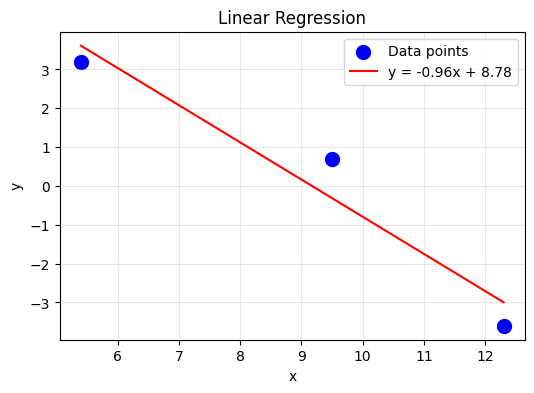

In [8]:
import numpy as np

import matplotlib.pyplot as plt

xs = [5.4, 9.5, 12.3]
ys = [3.2, 0.7, -3.6]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="blue", label="Data points", s=100)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.**

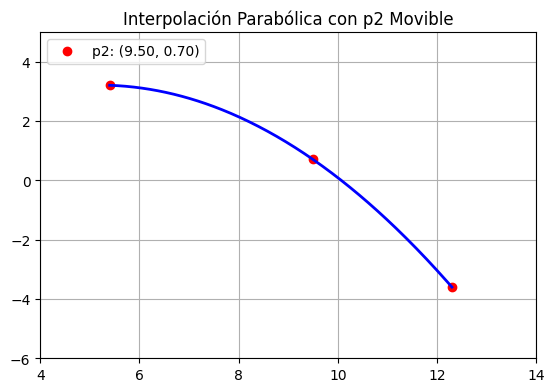

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

# Puntos fijos
p1 = [5.4, 3.2]
# Punto intermedio movible
p2 = [9.5, 0.7]
p3 = [12.3, -3.6]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
ax.set_xlim(4, 14)
ax.set_ylim(-6, 5)

# Dibujar los puntos
points, = ax.plot([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'ro')
curve, = ax.plot([], [], 'b-', linewidth=2)

# Crear leyenda vacía (se actualizará)
legend_text = ax.legend([f"p2: ({p2[0]:.2f}, {p2[1]:.2f})"], loc="upper left")

selected = [False]  # Para saber si estamos arrastrando p2

def interpolate_parabola(p1, p2, p3):
    # Sistema lineal para resolver coeficientes de parábola
    A = np.array([
        [p1[0]**2, p1[0], 1],
        [p2[0]**2, p2[0], 1],
        [p3[0]**2, p3[0], 1]
    ])
    b = np.array([p1[1], p2[1], p3[1]])
    a, b, c = np.linalg.solve(A, b)
    return lambda x: a*x**2 + b*x + c

def update_plot():
    # Actualiza los puntos y la curva
    points.set_data([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]])
    parabola = interpolate_parabola(p1, p2, p3)
    x_vals = np.linspace(p1[0], p3[0], 300)
    y_vals = parabola(x_vals)
    curve.set_data(x_vals, y_vals)

    # Actualiza la leyenda con las coordenadas de p2
    legend_text.remove()
    new_label = f"p2: ({p2[0]:.2f}, {p2[1]:.2f})"
    legend_texts = ax.legend([new_label], loc="upper left")


    fig.canvas.draw_idle()

def on_press(event):
    if event.button == MouseButton.LEFT:
        # Verifica si hizo clic cerca de p2
        if abs(event.xdata - p2[0]) < 0.3 and abs(event.ydata - p2[1]) < 0.3:
            selected[0] = True

def on_release(event):
    selected[0] = False

def on_motion(event):
    if selected[0] and event.xdata and event.ydata:
        p2[0], p2[1] = event.xdata, event.ydata
        update_plot()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

update_plot()
plt.title("Interpolación Parabólica con p2 Movible")
plt.grid(True)
plt.show()

**B) Interpole el siguiente conjunto de datos:**

## Conjunto de datos 1


xs = [

    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]

ys = [

    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

In [30]:
xs = [
    3.38,
    0.35,
    2.07,
    -0.45,
    -0.55,
    -1.06,
    -2.77,
    3.08,
    -3.98,
    -5.0,
    -3.18,
    -1.96,
    2.37,
    -1.66,
    4.09,
]

ys = [
    -0.04,
    1.28,
    0.65,
    2.18,
    1.70,
    1.96,
    3.36,
    0.18,
    3.35,
    4.16,
    2.95,
    2.34,
    0.38,
    1.75,
    -1.06,
]

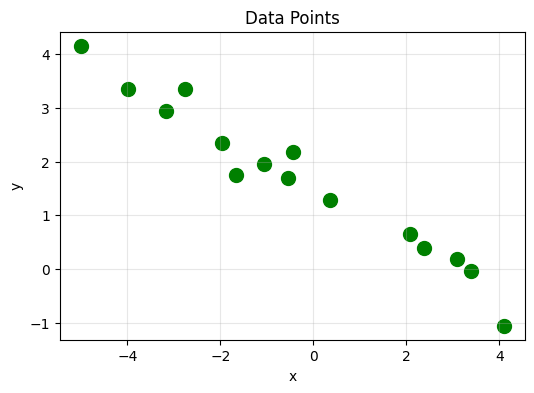

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="green", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

In [32]:
from src import ajustar_min_cuadrados

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])
print(f"m: {m}, b: {b}")

[12-15 20:54:21][INFO] Se ajustarán 2 parámetros.
m: -0.503232585436377, b: 1.4991976183166862


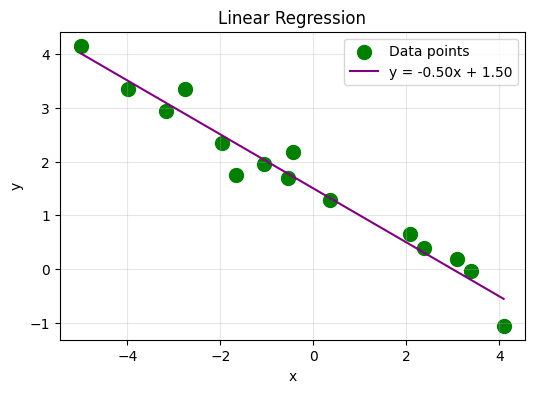

In [33]:
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="green", label="Data points", s=100)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="purple", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Conjunto de datos 2

(3.38, 15.65) (0.35, -11.20) (2.07, -4.00) (-0.45, 18.03) (-0.56, 7.94) (-1.06, 15.32) (-2.78, -4.40) (3.08, 1.39) (-3.99, -11.92) (-5.00, -90.24) (-3.18, 6.92) (-1.97, 28.35) (2.37, -2.41) (-1.67, -5.47) (4.09, 35.91) (-4.60, -55.53) (2.68, 0.77) (2.78, 4.79) (-3.79, -27.05) (-1.87, 2.85)

In [38]:
xs = [
    3.38,
    0.35,
    2.07,
    -0.45,
    -0.56,
    -1.06,
    -2.78,
    3.08,
    -3.99,
    -5.00,
    -3.18,
    -1.97,
    2.37,
    -1.67,
    4.09,
    -4.60,
    2.68,
    2.78,
    -3.79,
    -1.87,
]
ys = [
    15.65,
    -11.20,
    -4.00,
    18.03,
    7.94,
    15.32,
    -4.40,
    1.39,
    -11.92,
    -90.24,
    6.92,
    28.35,
    -2.41,
    -5.47,
    35.91,
    -55.53,
    0.77,
    4.79,
    -27.05,
    2.85,
]

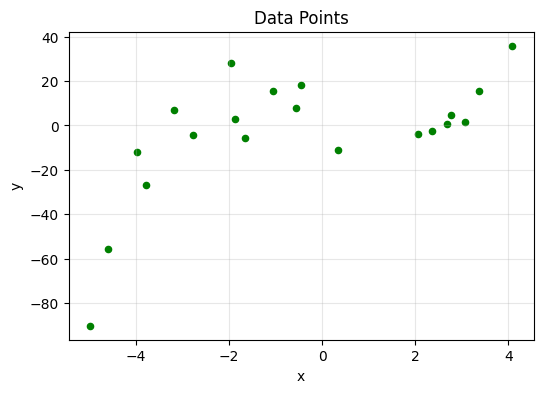

In [39]:
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="green", s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])
print(f"m: {m}, b: {b}")

[12-15 20:56:18][INFO] Se ajustarán 2 parámetros.
m: 5.686665564419458, b: -0.8375472244037535


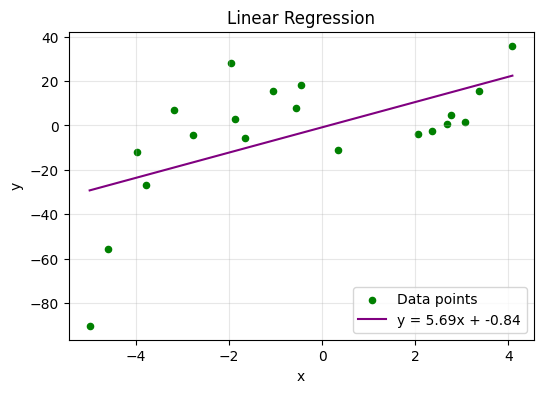

In [41]:
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="green", label="Data points", s=20)

# Plot the fitted line
x_line = np.linspace(min(xs), max(xs), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color="purple", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

El resultado no está correcto puesto que en este caso se trata de una función cúbica.

$$
\frac{\partial E}{\partial a}
=
2 \sum
\left( a x^{3} + b x^{2} + c x + d - y \right) x^{3}
= 0
$$

$$
\frac{\partial E}{\partial b}
=
2 \sum
\left( a x^{3} + b x^{2} + c x + d - y \right) x^{2}
= 0
$$

$$
\frac{\partial E}{\partial c}
=
2 \sum
\left( a x^{3} + b x^{2} + c x + d - y \right) x
= 0
$$

$$
\frac{\partial E}{\partial d}
=
2 \sum
\left( a x^{3} + b x^{2} + c x + d - y \right)
= 0
$$


In [47]:
# Derivadas parciales para regresión lineal
# ####################################################################
"""
y = ax^3 + bx^2 + cx + d

"""
def der_parcial_a(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    return [
        np.sum(xs**6),
        np.sum(xs**5),
        np.sum(xs**4),
        np.sum(xs**3),
        np.sum(xs**3 * ys)
    ]

def der_parcial_b(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    return [
        np.sum(xs**5),
        np.sum(xs**4),
        np.sum(xs**3),
        np.sum(xs**2),
        np.sum(xs**2 * ys)
    ]

def der_parcial_c(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    return [
        np.sum(xs**4),
        np.sum(xs**3),
        np.sum(xs**2),
        np.sum(xs),
        np.sum(xs * ys)
    ]

def der_parcial_d(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    return [
        np.sum(xs**3),
        np.sum(xs**2),
        np.sum(xs),
        len(xs),
        np.sum(ys)
    ]


In [48]:
a, b, c, d = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[
        der_parcial_a,
        der_parcial_b,
        der_parcial_c,
        der_parcial_d
    ]
)

print(f"a={a}, b={b}, c={c}, d={d}")


[12-15 21:22:36][INFO] Se ajustarán 4 parámetros.
a=1.044977916824698, b=0.03132740575354256, c=-8.880663970075506, d=2.762289919876904


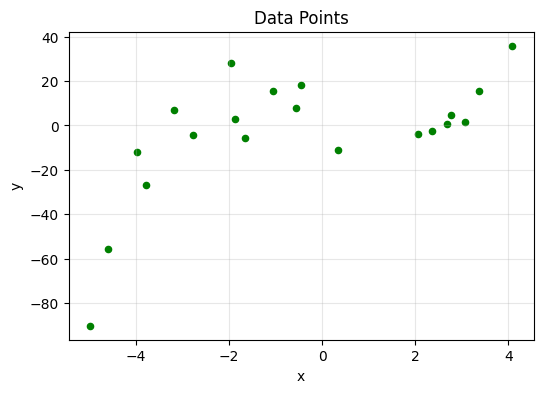

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="green", s=20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

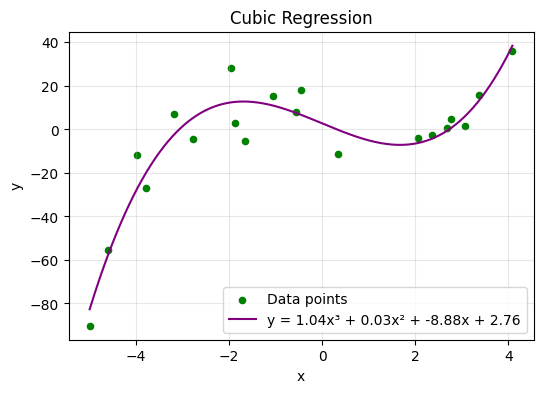

In [50]:
plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="green", label="Data points", s=20)

x_curve = np.linspace(min(xs), max(xs), 300)
y_curve = a*x_curve**3 + b*x_curve**2 + c*x_curve + d

plt.plot(x_curve, y_curve, color="purple",
         label=f"y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
